In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashion-mnist-small/fashion-mnist-small.csv
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

In [4]:
torch.manual_seed(42)

# EDA

In [5]:
df = pd.read_csv('/kaggle/input/fashion-mnist-small/fashion-mnist-small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


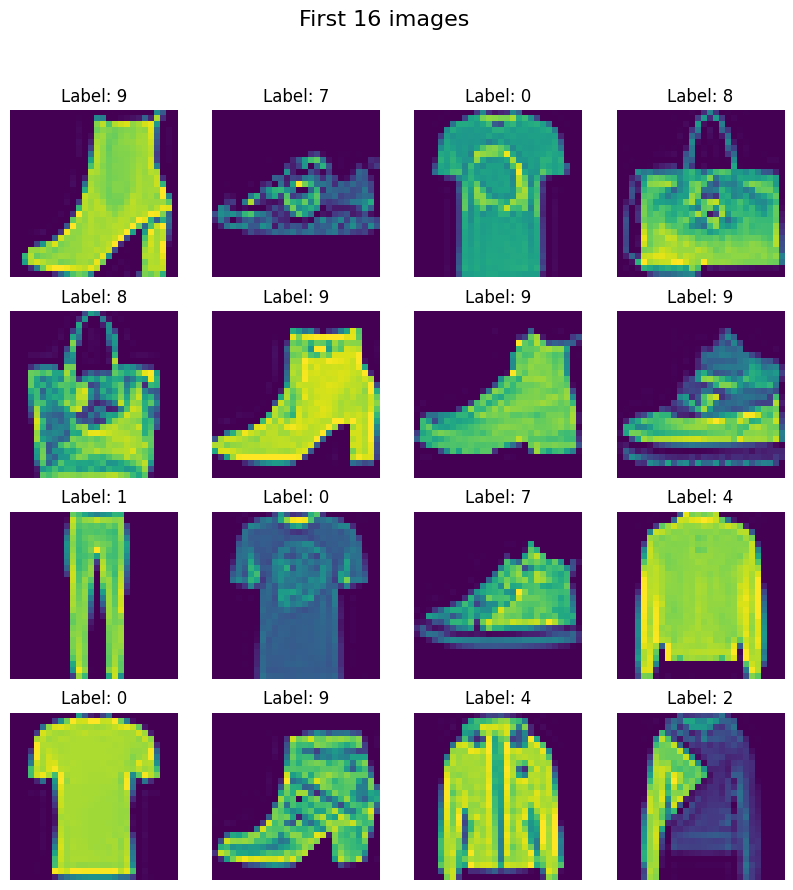

In [6]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 images", fontsize=16)

for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {df.iloc[i, 0]}")

plt.show()

In [7]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X = X / 255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Create custom dataset and dataloader instances

In [9]:
class CustomDataset(Dataset):
    
    def __init__(self, features, labels):
        super().__init__()
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    
    def __len__(self):
        return self.features.shape[0]
    
    def __getitem__(self, index):
        return (self.features[index], self.labels[index])

# Create train_dataset and test_dataset objects

In [10]:
train_dataset = CustomDataset(X_train, y_train)

In [11]:
len(train_dataset)

4800

In [12]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [13]:
test_dataset = CustomDataset(X_test, y_test)

# Create train_dataloader and test_loader objects

In [14]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the ANN

In [15]:
class ANN(nn.Module):
    
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, X):
        return self.model(X)

# Setup hyperparameters

In [16]:
epochs = 100
learning_rate = 0.1

# Instantiate model, loss function and optimizer

In [17]:
model = ANN(X_train.shape[1])
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop

In [18]:
for epoch in range(epochs):
    
    total_epoch_loss = 0
    
    for batch_features, batch_labels in train_loader:
        # forward pass
        y_train_pred = model(batch_features)

        # calculate loss
        loss = loss_function(y_train_pred, batch_labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()

        # update grads
        optimizer.step()

        total_epoch_loss += loss.item()

    average_epoch_loss = total_epoch_loss / len(train_loader)

    print(f"Epoch: {epoch + 1}, Loss: {average_epoch_loss}")

Epoch: 1, Loss: 1.3216368428866068
Epoch: 2, Loss: 0.7793365438779195
Epoch: 3, Loss: 0.6427524642149607
Epoch: 4, Loss: 0.575165742635727
Epoch: 5, Loss: 0.5281801904241245
Epoch: 6, Loss: 0.495287510852019
Epoch: 7, Loss: 0.4602433051665624
Epoch: 8, Loss: 0.435541773935159
Epoch: 9, Loss: 0.4185749634106954
Epoch: 10, Loss: 0.39913055901726086
Epoch: 11, Loss: 0.38526923845211664
Epoch: 12, Loss: 0.37294634282588957
Epoch: 13, Loss: 0.3497817688186963
Epoch: 14, Loss: 0.34788814852635064
Epoch: 15, Loss: 0.31599848583340645
Epoch: 16, Loss: 0.3118680293361346
Epoch: 17, Loss: 0.2936834237227837
Epoch: 18, Loss: 0.2892179740468661
Epoch: 19, Loss: 0.2741353053599596
Epoch: 20, Loss: 0.263867934991916
Epoch: 21, Loss: 0.26546819786230724
Epoch: 22, Loss: 0.24130918694039186
Epoch: 23, Loss: 0.24161443116764228
Epoch: 24, Loss: 0.22205657310783863
Epoch: 25, Loss: 0.2275674522916476
Epoch: 26, Loss: 0.20865238015850385
Epoch: 27, Loss: 0.21778246896962325
Epoch: 28, Loss: 0.20837314500

# Evaluate

In [19]:
# set model to evaluation mode
model.eval()

ANN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [20]:
total = 0
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        y_test_pred = model(batch_features)
        y_test_pred = torch.argmax(y_test_pred, dim=1)
        total += batch_labels.shape[0]
        correct += (y_test_pred == batch_labels).sum().item()

print(f"Accuracy: {correct / total}")        

Accuracy: 0.8241666666666667
